<img src="img/header.png" />

# Aula 03 - DataViz e Data Product com Streamlit

Vamos dar uma olhada em plotly bem básico pra vocês ficarem craques em gráficos RÁPIDOS, BONITOS e INTERATIVOS!!! Sem churumelas, vamos nessa!

In [1]:
# DataViz com Plotly Express
import plotly.express as px

In [2]:
# Scatter – gráfico de dispersão - correlação entre variáveis
iris = px.data.iris()

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<img src="img/iris.png" />

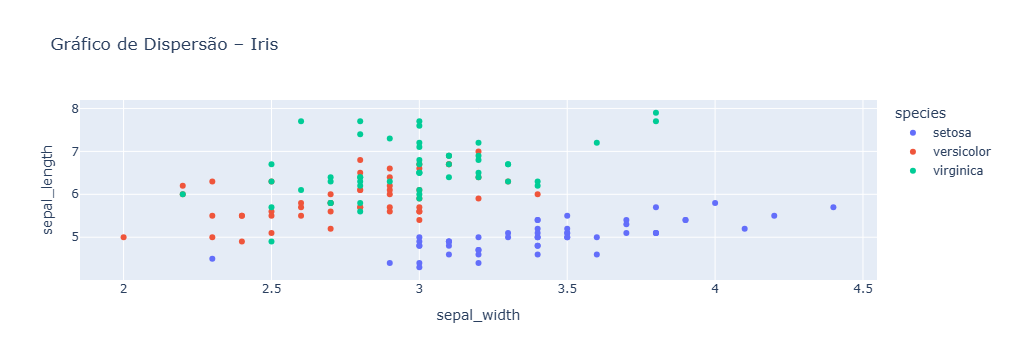

In [4]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length",
                 color="species", 
                 title="Gráfico de Dispersão – Iris")
fig.show()

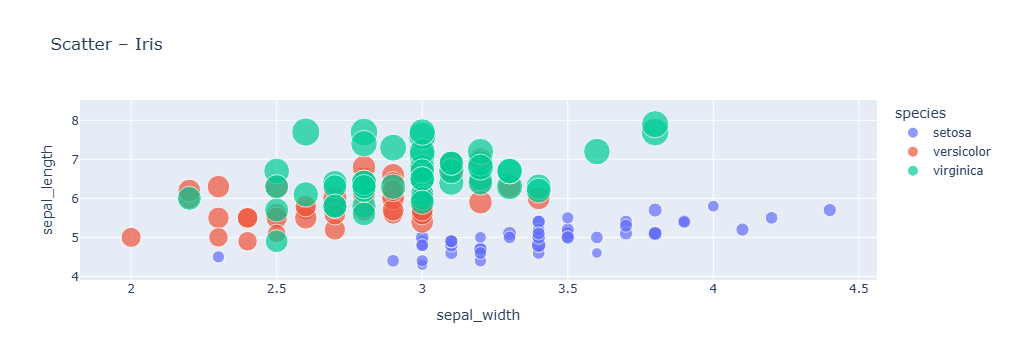

In [5]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length",
                 color="species", size="petal_length",
                 title="Scatter – Iris")
fig.show()

In [7]:
# Scatter (gráfico de dispersão) animado – Gapminder
gap = px.data.gapminder()

gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


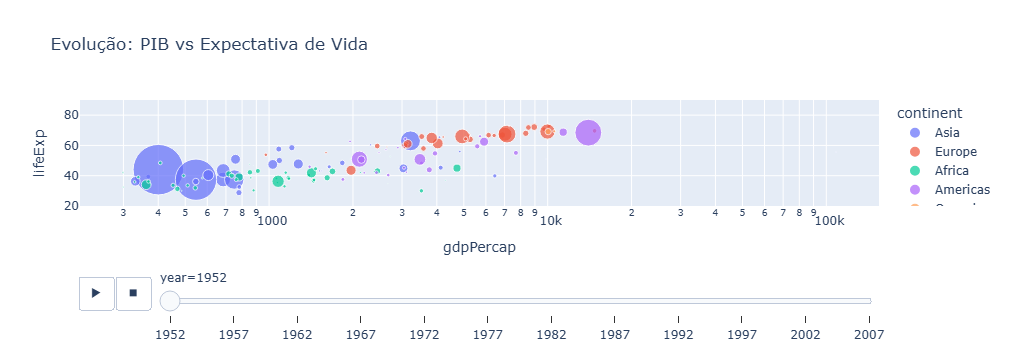

In [8]:
fig = px.scatter(gap, x="gdpPercap", y="lifeExp", animation_frame="year",
                 animation_group="country", size="pop", color="continent",
                 log_x=True, size_max=55, range_y=[20,90],
                 title="Evolução: PIB vs Expectativa de Vida")
fig.show()

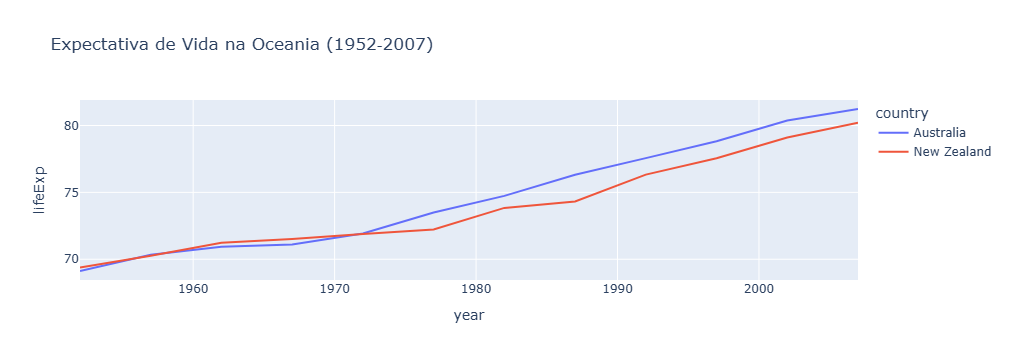

In [14]:
# Linha
# Exemplo de filtro de dataframe pandas sem loc e iloc
fig = px.line(gap.query("continent=='Oceania'"), x="year", y="lifeExp",
              color="country", title="Expectativa de Vida na Oceania (1952‑2007)")
fig.show()

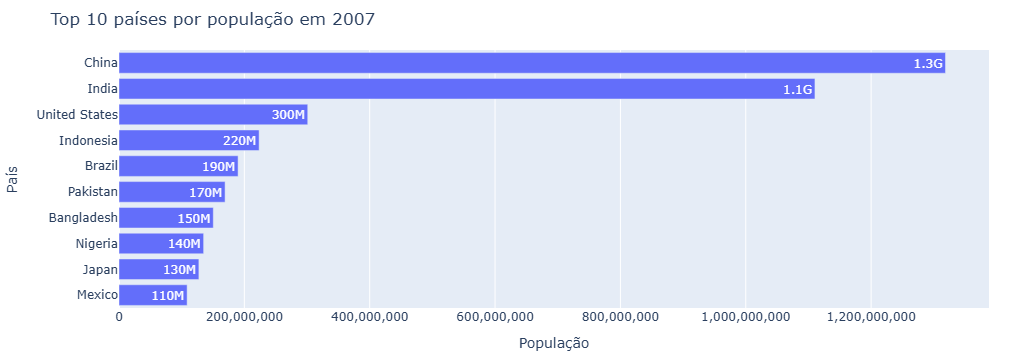

In [15]:
# Barra – população por continente em 2007
# Dataset Gapminder 2007
gap = px.data.gapminder().query("year == 2007")

# Agregação: Top 10 países mais populosos
df_top10 = (
    gap
    .groupby("country", as_index=False)
    .agg(pop_total=("pop", "sum"))
    .sort_values("pop_total", ascending=False)
    .head(10)
)

# Gráfico de barras horizontais
fig = px.bar(
    df_top10,
    x="pop_total",
    y="country",
    orientation="h",
    text_auto=".2s",
    title="Top 10 países por população em 2007",
    labels={"pop_total": "População", "country": "País"}
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_tickformat=",",
    margin=dict(l=100, r=20, t=50, b=20)
)

fig.show()


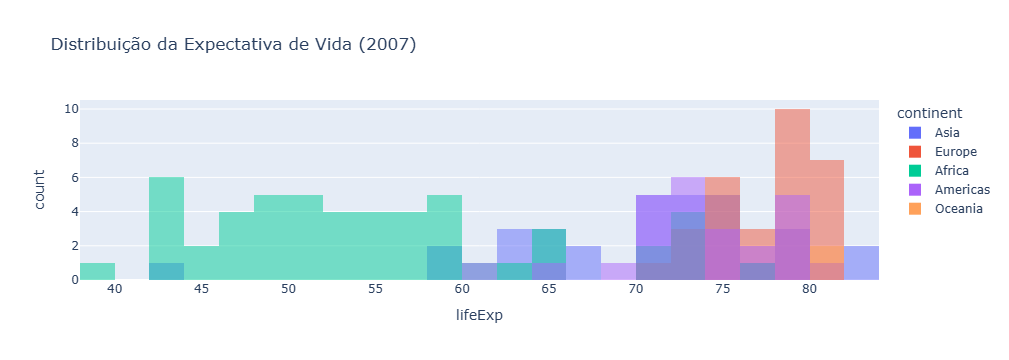

In [18]:
# Histograma – distribuição da expectativa de vida
fig = px.histogram(gap.query("year==2007"), x="lifeExp", nbins=30,
                   color="continent", barmode="overlay",
                   title="Distribuição da Expectativa de Vida (2007)")
fig.show()

In [23]:
gap['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

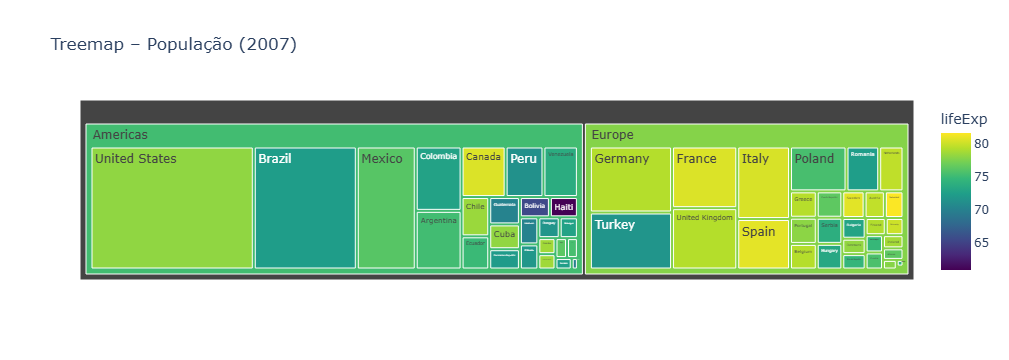

In [24]:
# Treemap – participação da população
gap_asia = gap.loc[(gap['year'] == 2007)& (gap['continent'].isin(['Americas', 'Europe']))]

fig = px.treemap(gap_asia,
                 path=["continent", "country"], values="pop",
                 color="lifeExp", color_continuous_scale="Viridis",
                 title="Treemap – População (2007)")
fig.show()

# Exporta todas as figuras como HTML interativos, se desejar:
# for i, f in enumerate(figures): f.write_html(f"fig{i}.html")